In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("youtube.csvfile.csv")
print(df)

          video_id trending_date  \
0      n1WpP7iowLc      17.14.11   
1      0dBIkQ4Mz1M      17.14.11   
2      5qpjK5DgCt4      17.14.11   
3      d380meD0W0M      17.14.11   
4      2Vv-BfVoq4g      17.14.11   
...            ...           ...   
40876  sGolxsMSGfQ      18.14.06   
40877  8HNuRNi8t70      18.14.06   
40878  GWlKEM3m2EE      18.14.06   
40879  lbMKLzQ4cNQ      18.14.06   
40880  POTgw38-m58      18.14.06   

                                                   title     channel_title  \
0             Eminem - Walk On Water (Audio) ft. Beyoncé        EminemVEVO   
1                          PLUSH - Bad Unboxing Fan Mail         iDubbbzTV   
2      Racist Superman | Rudy Mancuso, King Bach & Le...      Rudy Mancuso   
3                               I Dare You: GOING BALD!?          nigahiga   
4            Ed Sheeran - Perfect (Official Music Video)        Ed Sheeran   
...                                                  ...               ...   
40876                

In [7]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [8]:
df.isnull().any()

video_id                  False
trending_date             False
title                     False
channel_title             False
category_id               False
publish_time              False
tags                      False
views                     False
likes                     False
dislikes                  False
comment_count             False
thumbnail_link            False
comments_disabled         False
ratings_disabled          False
video_error_or_removed    False
description                True
dtype: bool

In [9]:
df["description"] = df["description"].fillna(value = "")

In [10]:
df.isnull().any()

video_id                  False
trending_date             False
title                     False
channel_title             False
category_id               False
publish_time              False
tags                      False
views                     False
likes                     False
dislikes                  False
comment_count             False
thumbnail_link            False
comments_disabled         False
ratings_disabled          False
video_error_or_removed    False
description               False
dtype: bool

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40881 non-null  object
 1   trending_date           40881 non-null  object
 2   title                   40881 non-null  object
 3   channel_title           40881 non-null  object
 4   category_id             40881 non-null  int64 
 5   publish_time            40881 non-null  object
 6   tags                    40881 non-null  object
 7   views                   40881 non-null  int64 
 8   likes                   40881 non-null  int64 
 9   dislikes                40881 non-null  int64 
 10  comment_count           40881 non-null  int64 
 11  thumbnail_link          40881 non-null  object
 12  comments_disabled       40881 non-null  bool  
 13  ratings_disabled        40881 non-null  bool  
 14  video_error_or_removed  40881 non-null  bool  
 15  de

In [24]:
cdf = df['trending_date'].apply(lambda x : '20'+x[:2]).value_counts().to_frame().reset_index().rename(columns = {"index":"year", "trending_date":"no_of_videos"})

In [25]:
print(cdf)

   year  no_of_videos
0  2018         31289
1  2017          9592


<BarContainer object of 2 artists>

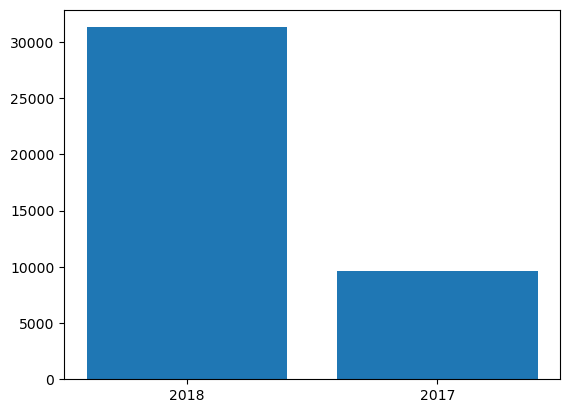

In [26]:
plt.bar(cdf['year'],cdf['no_of_videos'])

In [28]:
df['trending_date'].apply(lambda x : '20'+x[:2]).value_counts(normalize = True)

2018    0.765368
2017    0.234632
Name: trending_date, dtype: float64

In [29]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40881.000000,4.088100e+04,4.088100e+04,4.088100e+04,4.088100e+04
mean,20.795553,1.147036e+06,3.958269e+04,2.009195e+03,5.042975e+03
std,6.775054,3.390913e+06,1.326895e+05,1.900837e+04,2.157902e+04
min,1.000000,7.330000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,20.000000,1.439020e+05,2.191000e+03,9.900000e+01,4.170000e+02
50%,24.000000,3.712040e+05,8.780000e+03,3.030000e+02,1.301000e+03
75%,24.000000,9.633020e+05,2.871700e+04,9.500000e+02,3.713000e+03
max,43.000000,1.378431e+08,5.053338e+06,1.602383e+06,1.114800e+06


array([[<Axes: title={'center': 'views'}>]], dtype=object)

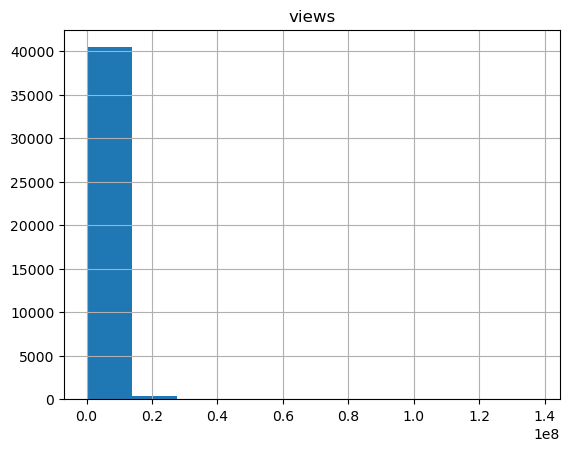

In [30]:
df.hist('views')

In [33]:
df[df['views']<1e6]['views'].count()/df['views'].count()*100

75.8200631100022

array([[<Axes: title={'center': 'likes'}>]], dtype=object)

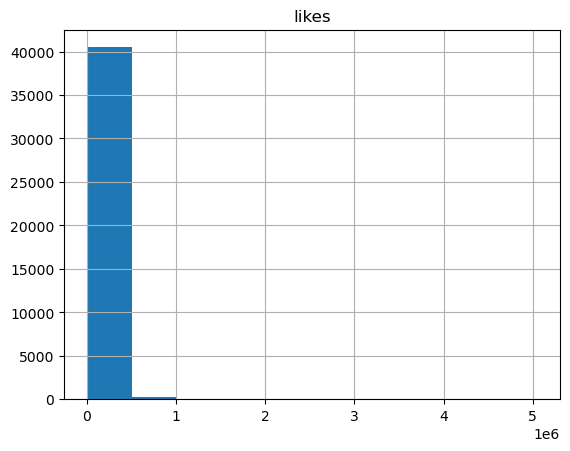

In [34]:
df.hist('likes')

In [35]:
df[df['likes']>50000]['likes'].count()/df['likes'].count()*100

16.230033511900395

In [36]:
df[df['dislikes']>50000]['dislikes'].count()/df['dislikes'].count()*100

0.44274846505711696

In [38]:
df[df['comment_count']>50000]['comment_count'].count()/df['comment_count'].count()*100

1.191262444656442

In [40]:
df.describe(include = 'O')

,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description
count,40881,40881,40881,40881,40881,40881,40881,40881
unique,24104,205,24573,5076,23613,20157,24422,22343
top,#NAME?,17.14.11,Most Popular Violin Covers of Popular Songs 20...,SET India,2017-12-20T23:00:00.000Z,[none],https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,
freq,525,200,15,192,11,2385,8,1296


In [41]:
df['title_length'] = df['title'].apply(lambda x : len(x))

In [42]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'title_length'],
      dtype='object')

In [43]:
df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,title_length
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,42
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,29
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,53
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,24
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,43


<Axes: >

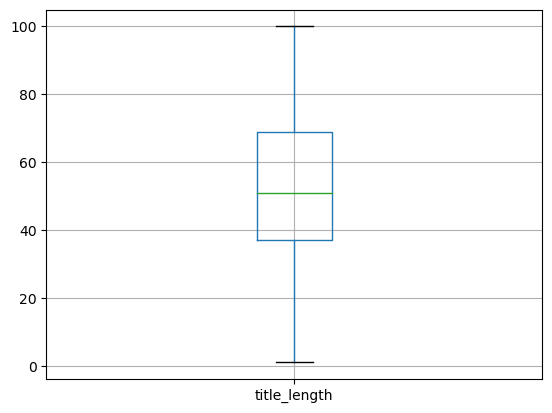

In [44]:
df.boxplot('title_length')

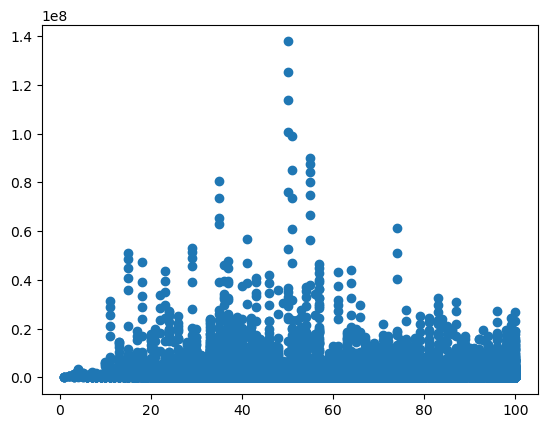

In [45]:
plt.scatter(df['title_length'], df['views'])

In [46]:
df.corr()

C:\Users\User\AppData\Local\Temp\ipykernel_8588\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,title_length
category_id,1.000000,-0.139610,-0.144363,-0.028731,-0.068848,0.038741,0.018377,-0.030002,-0.054168
views,-0.139610,1.000000,0.828964,0.557621,0.693107,0.004424,0.005745,0.001928,-0.013028
likes,-0.144363,0.828964,1.000000,0.460427,0.836585,-0.023057,-0.024729,0.001953,-0.090344
dislikes,-0.028731,0.557621,0.460427,1.000000,0.643494,-0.005282,-0.008762,0.000636,-0.010047
comment_count,-0.068848,0.693107,0.836585,0.643494,1.000000,-0.028109,-0.016602,0.003117,-0.063955
comments_disabled,0.038741,0.004424,-0.023057,-0.005282,-0.028109,1.000000,0.147903,-0.003092,0.033316
ratings_disabled,0.018377,0.005745,-0.024729,-0.008762,-0.016602,0.147903,1.000000,-0.002131,0.000122
video_error_or_removed,-0.030002,0.001928,0.001953,0.000636,0.003117,-0.003092,-0.002131,1.000000,-0.025707
title_length,-0.054168,-0.013028,-0.090344,-0.010047,-0.063955,0.033316,0.000122,-0.025707,1.000000


In [47]:
df.groupby('category_id').sum()

C:\Users\User\AppData\Local\Temp\ipykernel_8588\3495370890.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('category_id').sum()


,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,title_length
category_id,,,,,,,,
1,2939060844,77802003,3111259,10086573,15,13,11,106716
2,200066074,4732114,197776,1016188,2,0,1,17757
10,13179850194,564447530,22098190,52435252,20,12,1,215432
15,235592173,8830736,185003,1823538,0,0,0,15338
17,2997652188,59449419,3286369,7661342,14,10,1,188477
19,143746952,3750914,129861,609953,3,0,0,27764
20,1241532385,51726552,2446882,9664887,3,1,0,64081
22,3228227926,105388564,9480796,16818201,58,25,2,202180
23,3708438785,196046674,5372515,19638776,9,0,2,159895


<BarContainer object of 40881 artists>

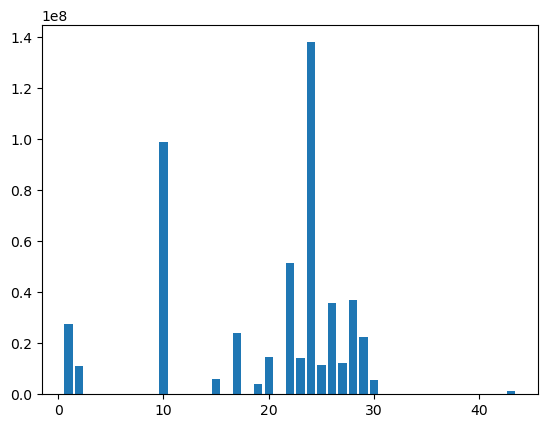

In [48]:
plt.bar(df['category_id'], df['views'])

<BarContainer object of 40881 artists>

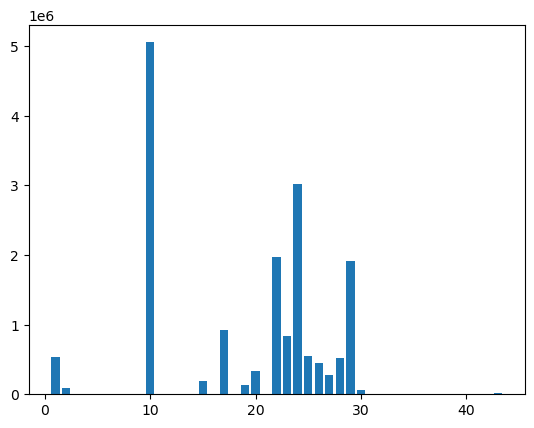

In [49]:
plt.bar(df['category_id'], df['likes'])

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40881 non-null  object
 1   trending_date           40881 non-null  object
 2   title                   40881 non-null  object
 3   channel_title           40881 non-null  object
 4   category_id             40881 non-null  int64 
 5   publish_time            40881 non-null  object
 6   tags                    40881 non-null  object
 7   views                   40881 non-null  int64 
 8   likes                   40881 non-null  int64 
 9   dislikes                40881 non-null  int64 
 10  comment_count           40881 non-null  int64 
 11  thumbnail_link          40881 non-null  object
 12  comments_disabled       40881 non-null  bool  
 13  ratings_disabled        40881 non-null  bool  
 14  video_error_or_removed  40881 non-null  bool  
 15  de

In [51]:
df['video_error_or_removed'].value_counts()

False    40854
True        27
Name: video_error_or_removed, dtype: int64

In [52]:
df['comments_disabled'].value_counts(normalize = True)

False    0.985739
True     0.014261
Name: comments_disabled, dtype: float64

In [53]:
len(df[(df['comments_disabled'] == True)& (df['ratings_disabled'] == True).index])

281